In [24]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis
from analyze_src.feature_extraction_analysis import FeatureExtractionAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [25]:
# Load the data
# Assuming you have already extracted the data into the 'extracted-data' folder

data_path = '/Users/mjraei/Desktop/Projects/Price-Predictor/data/scraped_boots_with_colors.csv'
df = pd.read_csv(data_path)

In [26]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product Name       877 non-null    object 
 1   Current Price      875 non-null    object 
 2   Original Price     279 non-null    object 
 3   Rating             877 non-null    float64
 4   Number of Reviews  873 non-null    float64
 5   Top Rated          877 non-null    bool   
 6   Best Seller        877 non-null    bool   
 7   Clearance          877 non-null    bool   
 8   New                877 non-null    bool   
 9   Color              867 non-null    object 
dtypes: bool(4), float64(2), object(4)
memory usage: 44.7+ KB
None


In [27]:
def convert_price_to_number(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        # Use regex to remove currency symbols and commas, convert to float
        df[column] = (
            df[column]
            .replace('[\$,]', '', regex=True)
            .astype(float)
        )
    return df

In [28]:
df = convert_price_to_number(df, ['Current Price', 'Original Price'])

# Feature Extraction Based on the Product Name

In [29]:
# Initialize the feature extraction analysis with your data
extractor = FeatureExtractionAnalysis(df)

# Extract Gender
extractor.extract_gender()
display(extractor.get_data()[['Product Name', 'Gender']].head())

# Extract Brand
extractor.extract_brand()
display(extractor.get_data()[['Product Name', 'Brand']].head())

# Extract Discount
extractor.extract_discount()
display(extractor.get_data()[['Product Name', 'Current Price', 'Original Price', 'Discount Percentage']].head())

df = extractor.get_data()
display(df.head())

,Product Name,Gender
0,Columbia Men's Telluron Omniheat II Waterproof...,Men's
1,Columbia Women's Minx Shorty IV Winter Boots,Women's
2,Columbia Women's Minx Slip V Winter Boots,Women's
3,Helly Hansen Men's Richmond Boots,Men's
4,Helly Hansen Kids' Varanger 2.0 Winter Waterpr...,Unspecified


,Product Name,Brand
0,Columbia Men's Telluron Omniheat II Waterproof...,Columbia
1,Columbia Women's Minx Shorty IV Winter Boots,Columbia
2,Columbia Women's Minx Slip V Winter Boots,Columbia
3,Helly Hansen Men's Richmond Boots,Helly Hansen
4,Helly Hansen Kids' Varanger 2.0 Winter Waterpr...,Unknown


,Product Name,Current Price,Original Price,Discount Percentage
0,Columbia Men's Telluron Omniheat II Waterproof...,159.99,NaN,0.000000
1,Columbia Women's Minx Shorty IV Winter Boots,139.99,NaN,0.000000
2,Columbia Women's Minx Slip V Winter Boots,149.99,NaN,0.000000
3,Helly Hansen Men's Richmond Boots,65.97,88.97,25.851411
4,Helly Hansen Kids' Varanger 2.0 Winter Waterpr...,44.97,62.97,28.585040


,Product Name,Current Price,Original Price,Rating,Number of Reviews,Top Rated,Best Seller,Clearance,New,Color,Gender,Brand,Discount Percentage
0,Columbia Men's Telluron Omniheat II Waterproof...,159.99,NaN,4.5,NaN,False,False,False,False,NaN,Men's,Columbia,0.000000
1,Columbia Women's Minx Shorty IV Winter Boots,139.99,NaN,0.0,NaN,False,False,False,False,NaN,Women's,Columbia,0.000000
2,Columbia Women's Minx Slip V Winter Boots,149.99,NaN,0.0,NaN,False,False,False,False,NaN,Women's,Columbia,0.000000
3,Helly Hansen Men's Richmond Boots,65.97,88.97,4.5,34.0,True,False,True,False,HONEY WHEAT -- 726,Men's,Helly Hansen,25.851411
4,Helly Hansen Kids' Varanger 2.0 Winter Waterpr...,44.97,62.97,3.0,1.0,False,False,True,False,COBALT,Unspecified,Unknown,28.585040


In [30]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
       Current Price  Original Price      Rating  Number of Reviews  \
count     875.000000      279.000000  877.000000         873.000000   
mean      133.198869      117.155341    3.480844         246.391753   
std        70.906407       61.935946    1.798369        1170.447146   
min         3.990000        6.880000    0.000000           0.000000   
25%        79.970000       69.970000    3.600000           1.000000   
50%       129.990000      111.970000    4.300000          23.000000   
75%       179.990000      169.990000    4.600000         138.000000   
max       469.000000      250.000000    5.000000       20887.000000   

       Discount Percentage  
count           877.000000  
mean              8.546860  
std              13.533094  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%              20.040080  
max              60.040006  

Summary Statistics (Categorical Features):
             


Missing Values Count by Column:
Current Price          2
Original Price       598
Number of Reviews      4
Color                 10
dtype: int64

Visualizing Missing Values...


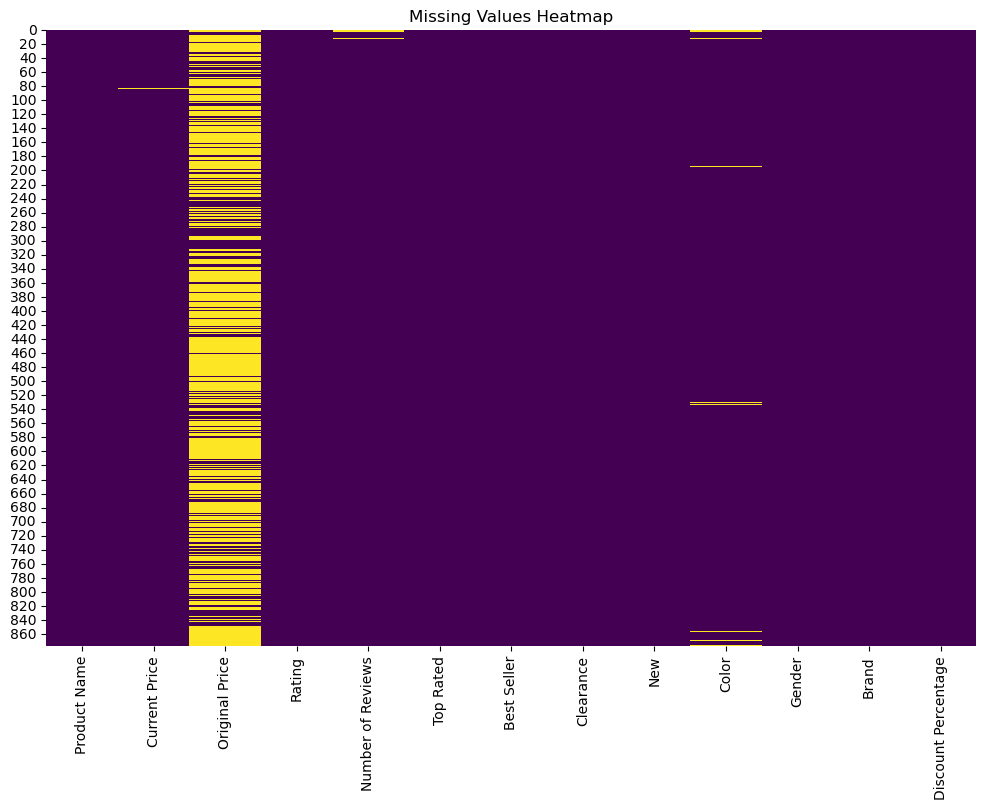

In [31]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

/opt/miniconda3/envs/tfenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


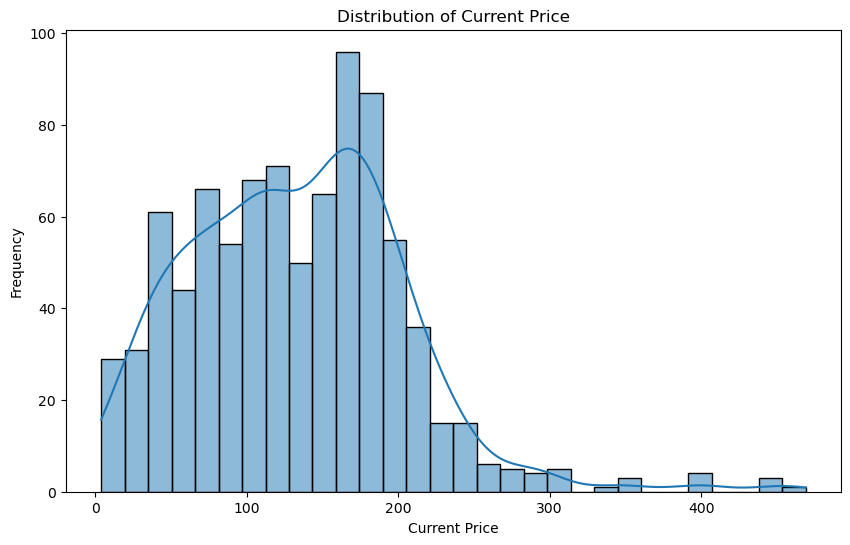

In [32]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Current Price')

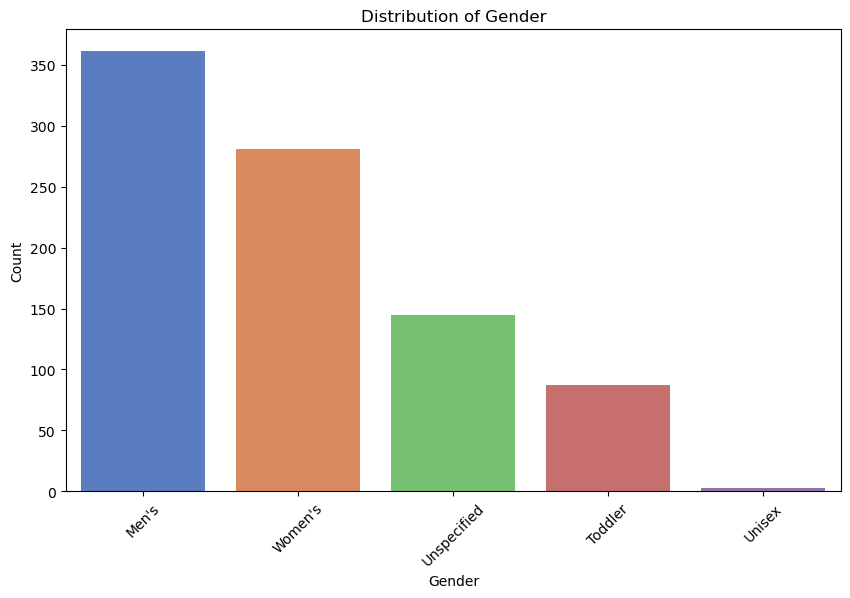

In [33]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Gender')

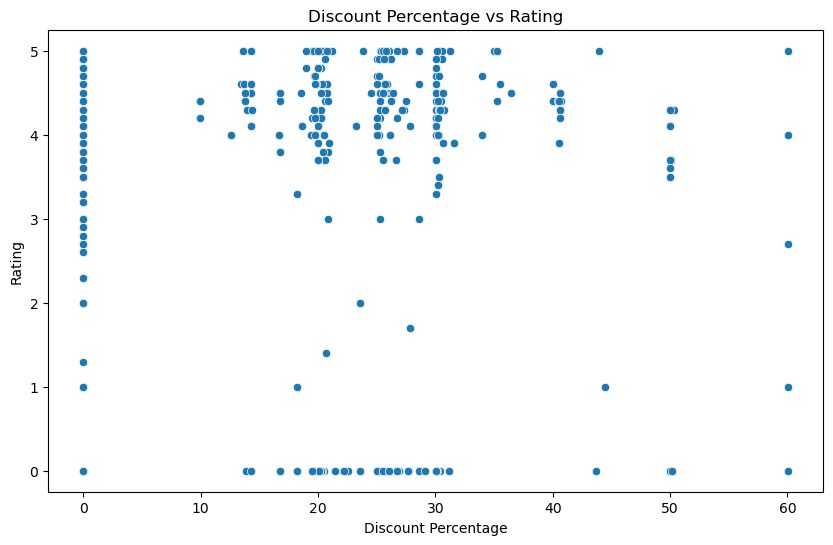

In [34]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Discount Percentage', 'Rating')

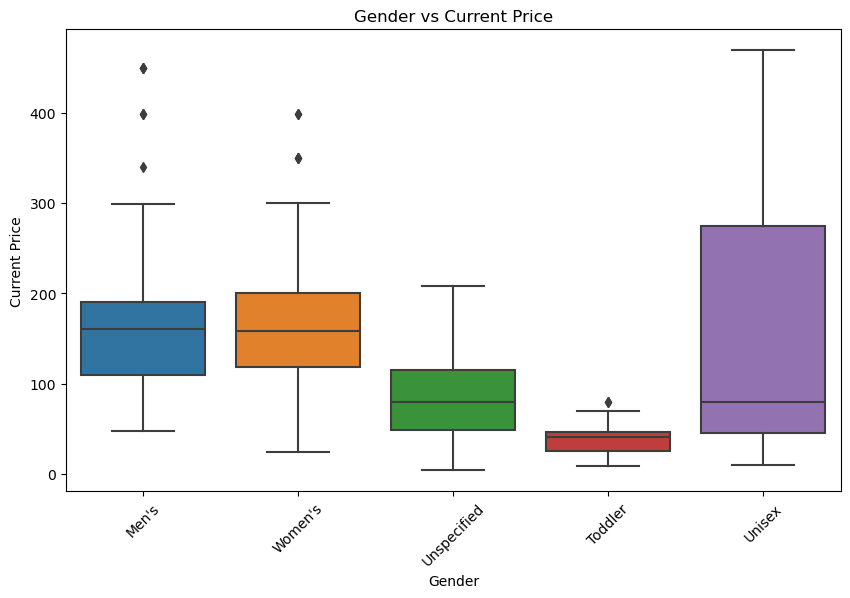

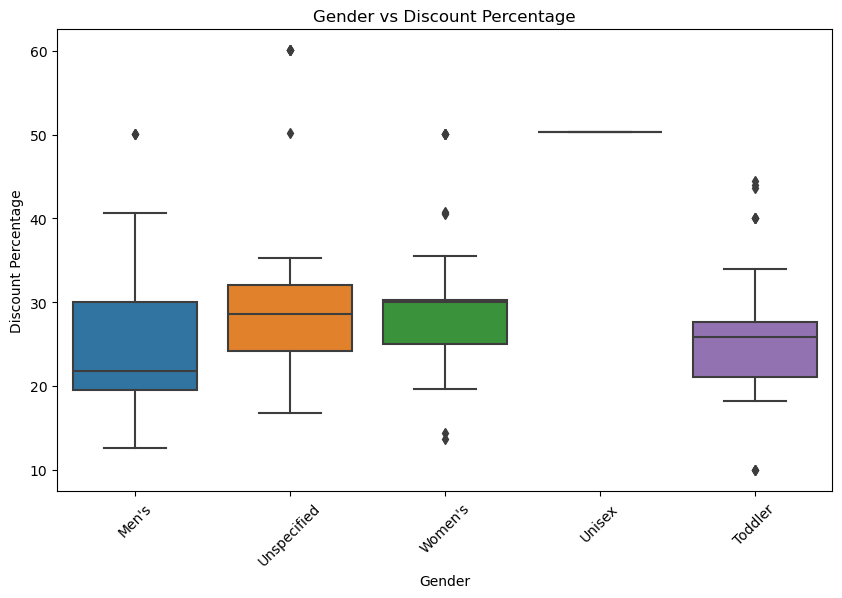

In [38]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Gender', 'Current Price')


# Filter the DataFrame to only include rows where Discount Percentage is not zero
df_non_zero_discount = df[df['Discount Percentage'] > 0]

# Plot Gender vs Discount Percentage for non-zero discounts
bivariate_analyzer.execute_analysis(df_non_zero_discount, 'Gender', 'Discount Percentage')

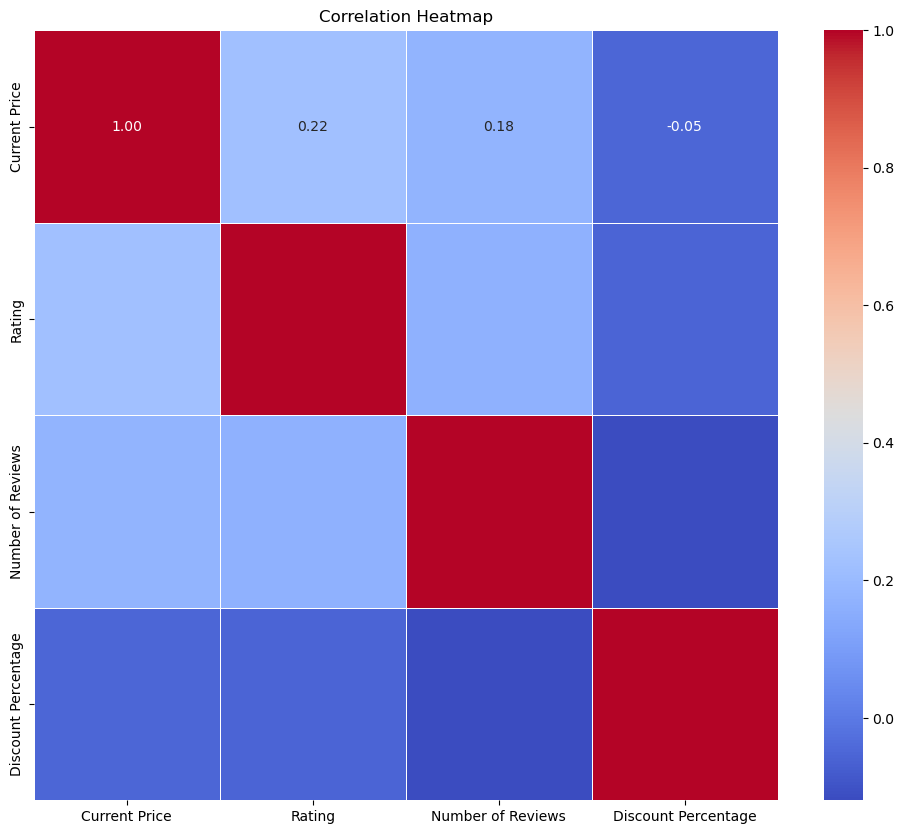

/opt/miniconda3/envs/tfenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/tfenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/tfenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/tfenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

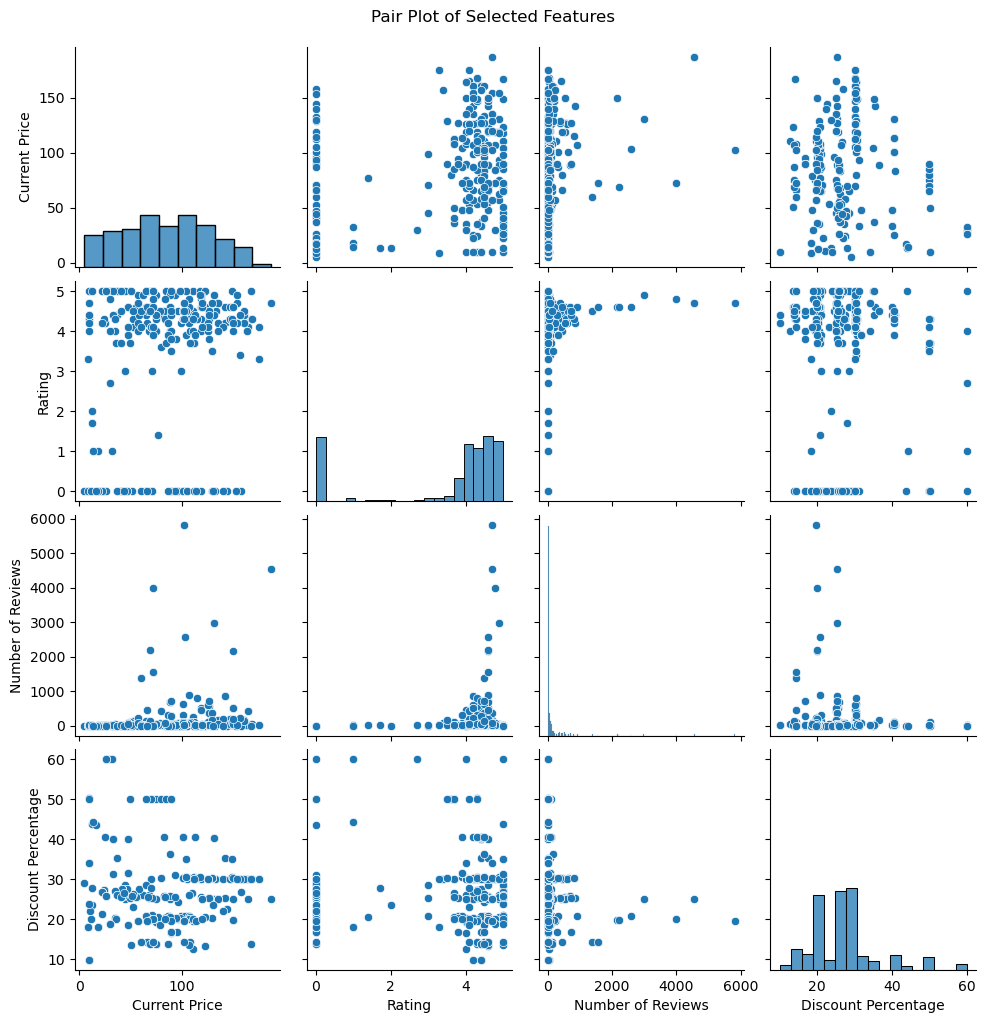

In [42]:
# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df_non_zero_discount[['Current Price', 'Rating', 'Number of Reviews', 'Discount Percentage']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)